In [30]:
''' PRE-PROCESSING (INDIVIDUAL 1) '''
''' Michelangelo Rubino '''

# The function preproc_df(filename) at the end of this stage can be used to perform the following transformations:

# Step 1 - delete the features with no values
# Step 2 - delete the features with duplicated values 
# Step 3 - remove highly correlated features (kendall/spearman >= 0.9)
# Step 4 - standardize the features to give them a distribution closer to the normal one

import csv
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 200) # it won't hide part of the output rows
pd.set_option('display.max_columns', 200) # it won't hide part of the output columns
set_printoptions(precision=3) # how the floating numbers are shown

''' Load the data from the train dataset and create a dataframe '''

filename = 'train_imperson_without4n7_balanced_data.csv'

# use the code below to load the test dataset
# filename = 'test_imperson_without4n7_balanced_data.csv'

df = pd.read_csv(filename,
                header=0,
                na_values=['nan'])


In [18]:
''' View dataframe info '''

# the dataframe does not contain null values (it can be verified by using df.isnull().sum())
# 97,044 rows, 153 columns
# the class is the feature 155
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40158 entries, 0 to 40157
Columns: 153 entries, 1 to 155
dtypes: float64(42), int64(111)
memory usage: 46.9 MB
None


In [ ]:
''' Descriptive statistics '''
print(df.describe())

In [ ]:
''' Check the first 10 rows '''
df.head(10)

In [ ]:
''' The observations are perfectly balanced: 50% class 0, 50% class 1 '''
class_counts = df.groupby('155').size()
print(class_counts)


In [19]:
''' Step 1 - Delete columns with no values '''

# many features have no values
columnsToDelete = [] 

# if the feature has std == 0 it means no values or only one value
for key, value in df.iteritems():
    if df[key].std() == 0:
        columnsToDelete.append(key)
        
df1 = df.drop(columnsToDelete, axis=1) # 74 features have been deleted

# the features are now 78 + 1 class
print(df1.columns.values)


['5' '6' '8' '9' '14' '15' '16' '18' '20' '26' '29' '38' '43' '47' '48'
 '50' '51' '52' '61' '62' '64' '66' '67' '68' '69' '70' '71' '72' '73'
 '75' '76' '77' '78' '79' '80' '81' '82' '89' '90' '93' '94' '98' '104'
 '105' '106' '107' '108' '109' '110' '111' '112' '118' '119' '120' '121'
 '122' '123' '125' '126' '127' '128' '129' '130' '140' '141' '142' '143'
 '144' '145' '146' '148' '154' '155']


In [20]:
''' Step 2 - Some features are duplicates of other features, then they can be removed keeping only the first column '''

# df has 14 duplicated features, then the new dataframe has 64 features + 1 class
df2 = df1.loc[:,~df1.T.duplicated(keep='first')]

# the features are now 64 + 1 class
print(df2.columns.values)


['5' '8' '14' '38' '47' '48' '50' '51' '61' '64' '66' '67' '68' '69' '70'
 '71' '72' '73' '75' '76' '77' '78' '79' '80' '81' '82' '90' '93' '94'
 '98' '104' '105' '106' '107' '108' '109' '110' '111' '112' '118' '119'
 '120' '121' '122' '123' '125' '126' '127' '128' '140' '141' '142' '143'
 '144' '145' '148' '154' '155']


In [ ]:
''' Check the unique values for each feature '''

print(df2.nunique()) 


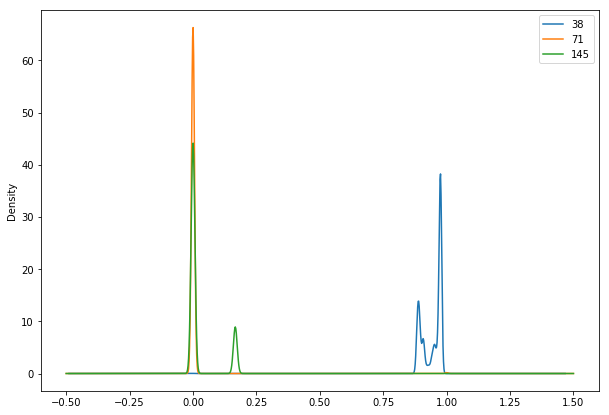

In [22]:
'''Plot the distribution for the 3 main groups:

    - features with continuous values between 0 and 1 (ex: 38)
    - features with only two values, 0 and 1 (ex: 71)
    - features with a few values (ex: 145) '''

# no feature with a perfect normal distribution
df2[["38", "71", "145"]].plot.kde(figsize=(10,7), sharex=False)
pyplot.show()


In [23]:
''' Step 3 - Create two correlation matrices (Kendall and Spearman) and remove highly correlated features (ie. >= 0.9 )'''

# Create correlation matrix with kendall method
corr_matrix_kendall = df2.corr(method='kendall').abs()

# Create a True/False mask and apply it
mask_kendall = np.triu(np.ones_like(corr_matrix_kendall, dtype=bool))
tri_df_kendall = corr_matrix_kendall.mask(mask_kendall)

# List column names of highly correlated features ( >= 0.90 )
kendall_to_drop = [c for c in tri_df_kendall.columns if any(tri_df_kendall[c] >= 0.90)]

# Create correlation matrix with spearman method
corr_matrix_spearman = df2.corr(method='spearman').abs()

# Create a True/False mask and apply it
mask_spearman = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
tri_df_spearman = corr_matrix_spearman.mask(mask_spearman)

# List column names of highly correlated features ( >= 0.90 )
spearman_to_drop = [c for c in tri_df_spearman.columns if any(tri_df_spearman[c] >= 0.90)]

# The two methods show almost the same features, 19 are in common, 1 is not
drop_high_corr = []
for i in kendall_to_drop:
    if i in spearman_to_drop:
        drop_high_corr.append(i)

# drop the 19 common features with high correlation both with kendall and spearman       
df3 = df2.drop(drop_high_corr, axis=1)  

# print the common features removed from the dataframe
print(drop_high_corr)


['50', '66', '68', '69', '78', '90', '93', '98', '107', '108', '118', '119', '126', '127']


In [24]:
''' After this step the dataframe has 45 features and 1 class '''

print(len(df3.columns.values))
print(df3.columns.values)

44
['5' '8' '14' '38' '47' '48' '51' '61' '64' '67' '70' '71' '72' '73' '75'
 '76' '77' '79' '80' '81' '82' '94' '104' '105' '106' '109' '110' '111'
 '112' '120' '121' '122' '123' '125' '128' '140' '141' '142' '143' '144'
 '145' '148' '154' '155']


In [ ]:
''' Analysis and plotting of the dataframe df3 show that none of the features has a normal form '''

# Uncomment to see the plots

# skewness
#skew = df3.skew()
#print(skew)

# histogram plot
#df3.hist(layout=(9,9), figsize=(30,14))
#pyplot.show()

# density plot
#df3.plot(kind='density', subplots=True, layout=(9,9), sharex=False, figsize=(20,14))
#pyplot.show()

# Box and Whisker Plot
#df3.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False, figsize=(20,14))
#pyplot.show()

# Scatterplot Matrix
# it takes a lot to run
# scatter_matrix(df3, figsize=[20, 20])
# pyplot.show()


In [25]:
''' Step 4 - Standardize the features to give them a normal form: mean = 0, sd = 1 '''

# save the features name
features_names = df3.columns.values

# use the array lenght
df3_len = len(df3.columns.values) - 1

# extract the values from the dataframe
array = df3.values
X = array[:, 0:df3_len] # extract the features
Y = array[:, df3_len].astype(int) # extract the class

# fit and transform the values
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# a new dataframe is created with the standardized values
df4 = pd.DataFrame(rescaledX, columns=features_names[0:df3_len])

# add the class 155
df4.insert(df3_len, '155', Y, False)


In [ ]:
''' Now we have a dataframe with standardized values '''

print(df4.head(5))


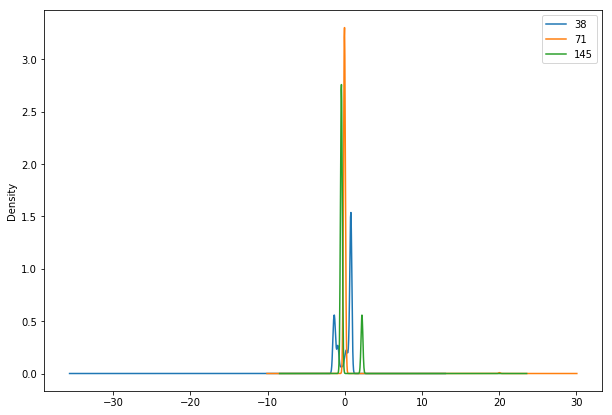

In [27]:
''' After standardizing, the features do not show a perfect bell-shaped distribution, but there
    is some improvement '''

df4[["38", "71", "145"]].plot.kde(figsize=(10,7), sharex=False )
pyplot.show()


In [ ]:
''' This function performs the steps previously described '''

filename = 'train_imperson_without4n7_balanced_data.csv'

def preproc_df(filename):
    dataframe = pd.read_csv(filename, header=0, na_values=['nan'])
    
    # Step 1 - remove features with no values
    columnsToDelete = [] 
    for key, value in dataframe.iteritems():
        if dataframe[key].std() == 0:
            columnsToDelete.append(key)
        
    df1 = dataframe.drop(columnsToDelete, axis=1)
    
    # Step 2 - remove duplicated features, keeping only the first one 
    df2 = df1.loc[:,~df1.T.duplicated(keep='first')]
    
    # Step 3 - Compute correlation matrices and drop the features with high correlation 
    corr_matrix_kendall = df2.corr(method='kendall').abs()
    mask_kendall = np.triu(np.ones_like(corr_matrix_kendall, dtype=bool))
    tri_df_kendall = corr_matrix_kendall.mask(mask_kendall)
    kendall_to_drop = [c for c in tri_df_kendall.columns if any(tri_df_kendall[c] >= 0.90)]

    corr_matrix_spearman = df2.corr(method='spearman').abs()
    mask_spearman = np.triu(np.ones_like(corr_matrix_spearman, dtype=bool))
    tri_df_spearman = corr_matrix_spearman.mask(mask_spearman)
    spearman_to_drop = [c for c in tri_df_spearman.columns if any(tri_df_spearman[c] >= 0.90)]
    
    # list the features having high kendall and spearman correlation
    drop_high_corr = []
    for i in kendall_to_drop:
        if i in spearman_to_drop:
            drop_high_corr.append(i)

    # drop the common features       
    df3 = df2.drop(drop_high_corr, axis=1)  
    
    # Step 4 - Standardize the features
    features_names = df3.columns.values # save the feature names
    df3_len = len(df3.columns.values) - 1 # use the array length 

    # extract the values from the dataframe (features and class)
    array = df3.values
    X = array[:, 0:df3_len] 
    Y = array[:, df3_len].astype(int) 

    # fit and transform the values
    scaler = StandardScaler().fit(X)
    rescaledX = scaler.transform(X)

    # a new dataframe is created with the standardized values
    df4 = pd.DataFrame(rescaledX, columns=features_names[0:df3_len])

    # add the class 155
    df4.insert(df3_len, '155', Y, False)

    return df4


In [ ]:
''' Before the Feature selection stage the train dataset has 45 features and 1 class

['5' '8' '14' '38' '48' '51' '61' '67' '70' '71' '72' '73' '75' '76' '77'
 '78' '79' '80' '82' '83' '88' '93' '94' '104' '105' '106' '109' '110'
 '111' '112' '113' '117' '120' '121' '122' '123' '125' '130' '138' '140'
 '142' '143' '144' '145' '154' '155']


while the test dataset has 43 features and 1 class

['5' '8' '14' '38' '47' '48' '51' '61' '64' '67' '70' '71' '72' '73' '75'
 '76' '77' '79' '80' '81' '82' '94' '104' '105' '106' '109' '110' '111'
 '112' '120' '121' '122' '123' '125' '128' '140' '141' '142' '143' '144'
 '145' '148' '154' '155']
 
'''
